# IAA and Cohen's Kappa for ABSA 


*note: the output of the examples of disagreement is hidden because it shows private data*

In [1]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt

# read in the annotated 50 sentences for each annotator

directory1 = 'path/to/fiftysents_A1.csv'
directory2 = 'path/to/fiftysents_A2.csv'
directory3 = 'path/to/fiftysents_A3.csv'

df1 = pd.read_csv(directory1, sep=';')
df2 = pd.read_csv(directory2, sep=';')
df3 = pd.read_csv(directory3, sep=';')

sentence = df1['Sentence'].astype(str)   # read the sentence column
number = (df1['Sentence_ID'].fillna('0')).astype(int)    # read the sentence id column

### Aspect Category agreement
**Categories:**
- a. Service 
- b. Company
- c. Staff
- d. Price
- e. Travel
- f. Aircraft equipment
- g. Food
- h. Safety
- i. Boarding
- j. Luggage
- k. Information
- l. Others
- m. Multiple
- n. NA (no aspect)

In [10]:
def convert_category_labels(aspect_category_series):
    """"
    Funtion to convert the AC labels from letters, 
    to their corresponding Category names
    """"
    
    aspect_category_series = aspect_category_series.replace(['a'], 'Service')
    aspect_category_series = aspect_category_series.replace(['b'], 'Company')
    aspect_category_series = aspect_category_series.replace(['c'], 'Staff')
    aspect_category_series = aspect_category_series.replace(['d'], 'Price')
    aspect_category_series = aspect_category_series.replace(['e'], 'Travel')
    aspect_category_series = aspect_category_series.replace(['f'], 'Aircraft equipment')
    aspect_category_series = aspect_category_series.replace(['g'], 'Food')
    aspect_category_series = aspect_category_series.replace(['h'], 'Safety')
    aspect_category_series = aspect_category_series.replace(['i'], 'Boarding')
    aspect_category_series = aspect_category_series.replace(['j'], 'Luggage')
    aspect_category_series = aspect_category_series.replace(['k'], 'Information')
    aspect_category_series = aspect_category_series.replace(['l'], 'Others')
    aspect_category_series = aspect_category_series.replace(['m'], 'Multiple')
    aspect_category_series = aspect_category_series.replace(['n'], 'NA')

    return aspect_category_series

def convert_sentiment_labels(sentiment_series):
    """"
    Funtion to convert the SP labels from letters, 
    to their corresponding Polarity names
    """"
    
    sentiment_series = sentiment_series.replace(['-1.0'], 'Negative')
    sentiment_series = sentiment_series.replace(['1.0'], 'Positive')
    sentiment_series = sentiment_series.replace(['0.0'], 'Neutral')
    sentiment_series = sentiment_series.replace(['2.0'], 'Mix')

    return sentiment_series

In [3]:
# replace letters with category names
as_cat1 = df1['Aspect_Category'].astype(str)
as_cat1 = convert_category_labels(as_cat1)

as_cat2 = df2['Aspect_Category'].astype(str)
as_cat2 = convert_category_labels(as_cat2)

In [ ]:
# check examples of disagreement
i = 0
for n, text, as1, as2 in zip(number, sentence, as_cat1, as_cat2):
    if as1 != as2:
        print(n,'TEXT:')
        print(text)
        print()
        print('A1:  ', as1, '   A2:  ', as2)
        print('___________________________________________________')
        print()
        i += 1
print(i)        

In [5]:
# cohen's kappa
c_k = cohen_kappa_score(as_cat1, as_cat2)
print(c_k)

0.8090375287209599


### Sentiment Agreement
•	Positive (1)
•	Negative (-1)
•	Neutral (0)
•	Mix (2)

In [11]:
sentiment1 = df1['Sentiment'].astype(str)
sentiment1 = convert_sentiment_labels(sentiment1)

sentiment2 = df2['Sentiment'].astype(str)
sentiment2 = convert_sentiment_labels(sentiment2)

In [ ]:
# check examples of disagreement between A1 and A2
i = 0
for n, text, s1, s2 in zip(number, sentence, sentiment1, sentiment2):
    if s1 != s2:
        print(n,'TEXT:')
        print(text)
        print()
        print('A1:  ', s1, '   A2:  ', s2)
        print('___________________________________________________')
        print()
        i += 1
print(i)   

In [13]:
# cohen's kappa
c_k = cohen_kappa_score(sentiment1, sentiment2)
print(c_k)

0.8993487270574304


**Confusion matrix and Heatmap**

In [20]:
# confusion matrix

labels_cat = ['Service',
'Company',
'Staff',
'Price',
'Travel',
'Aircraft equipment',
'Food',
'Safety',
'Boarding',
'Luggage',
'Information',
'Others',
'Multiple',
'NA']

labels_sent = ['Positive', 'Negative', 'Neutral', 'Mix']

cm_cat = confusion_matrix(as_cat1, as_cat2, labels=labels_cat)
print('CATEGORY:    ')
print(cm_cat)
print()
cm_sent = confusion_matrix(sentiment1, sentiment2, labels=labels_sent)
print('SENTIMENT:    ')
print(cm_sent)

CATEGORY:    
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  4  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 15]]

SENTIMENT:    
[[11  0  0  0]
 [ 0 12  0  0]
 [ 2  2 25  0]
 [ 0  1  0  1]]


In [36]:
# heatmap function
def cm_heatmap(cm, labels_list):
    plt.figure(figsize=(7, 7))
    sn.set(font_scale=1.4)
    sn.heatmap(cm, xticklabels=labels_list, yticklabels=labels_list,
               annot=True, cmap='Blues', fmt='g')

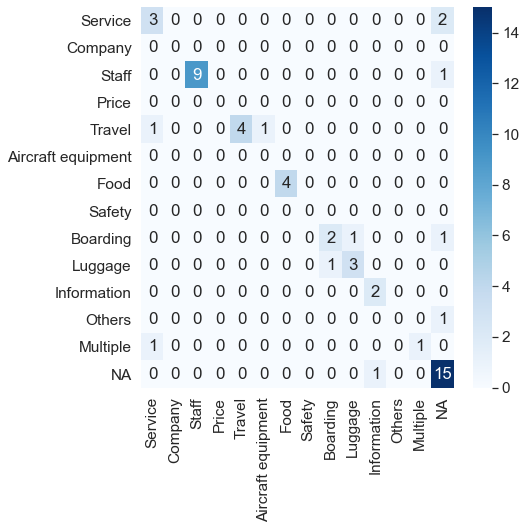

In [38]:
# heatmap categories
cm_heatmap(cm_cat, labels_cat)

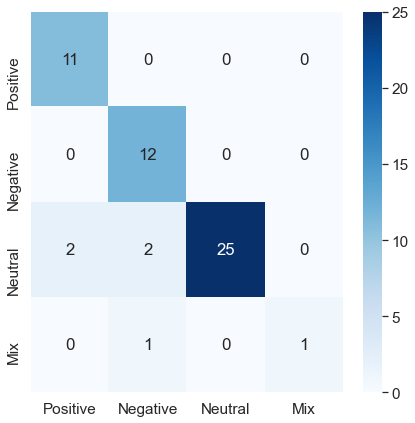

In [39]:
# heatmap sentiment
cm_heatmap(cm_sent, labels_sent)

## Annotator 3 check

In [23]:
as_cat3 = df3['Aspect_Category'].astype(str)
as_cat3 = convert_category_labels(as_cat3)

In [ ]:
# check examples of disagreement between the three annotators
i = 0
for n, text, as3, as1, as2 in zip(number, sentence, as_cat3, as_cat1, as_cat2):
    if as3 != as2:
        print(n,'TEXT:')
        print(text)
        print()
        print('A3:  ', as3, '   A1:  ', as1, '   A2:  ', as2)
        print('___________________________________________________')
        print()
        i += 1
print(i)        

In [25]:
# cohen's kappa A3 and A1
c_k = cohen_kappa_score(as_cat3, as_cat1)
print(c_k)

0.7782794080762478


In [26]:
# cohen's kappa A3 and A2
c_k = cohen_kappa_score(as_cat3, as_cat2)
print(c_k)

0.7592311583206879


In [30]:
sentiment3 = df3['Sentiment'].astype(str)
sentiment3 = convert_sentiment_labels(sentiment3)

In [31]:
# cohen's kappa A3 and A1
c_k = cohen_kappa_score(sentiment3, sentiment1)
print(c_k)

0.8770343580470162


In [32]:
# cohen's kappa A3 and A2
c_k = cohen_kappa_score(sentiment3, sentiment2)
print(c_k)

0.8590882178804026


In [ ]:
# check examples of disagreement
i = 0
for n, text, s3, s1 in zip(number, sentence, sentiment3, sentiment1):
    if s3 != s1:
        print(n,'TEXT:')
        print(text)
        print()
        print('A3:  ', s3, '   A1:  ', s1)
        print('___________________________________________________')
        print()
        i += 1
print(i)   

In [35]:
cm_cat23 = confusion_matrix(as_cat2, as_cat3, labels=labels_cat)
print('CATEGORY between A2 & A3:    ')
print(cm_cat23)
print()
cm_cat13 = confusion_matrix(as_cat1, as_cat3, labels=labels_cat)
print('CATEGORY between A1 & A3:    ')
print(cm_cat13)
print()

CATEGORY between A2 & A3:    
[[ 4  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 3  0  0  0  1  0  1  1  2  0  0  0  0 12]]

CATEGORY between A1 & A3:    
[[ 4  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0 

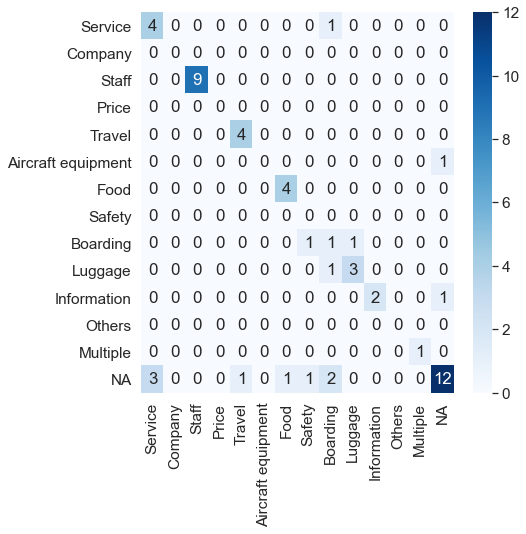

In [40]:
# heatmap category A2 & A3
cm_heatmap(cm_cat23, labels_cat)

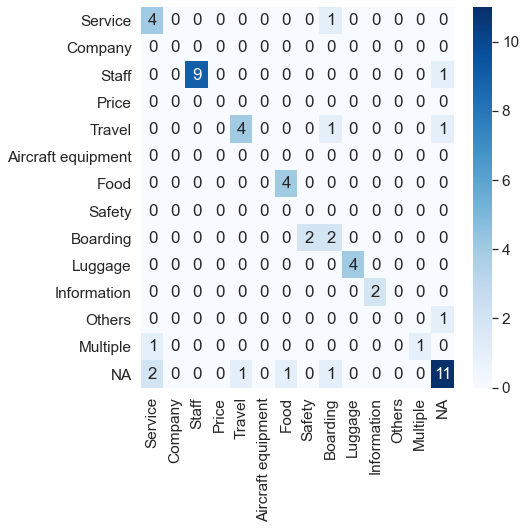

In [41]:
# heatmap category A1 & A3
cm_heatmap(cm_cat13, labels_cat)

In [42]:
cm_sent23 = confusion_matrix(sentiment2, sentiment3, labels=labels_sent)
print('SENTIMENT:    ')
print(cm_sent23)
cm_sent13 = confusion_matrix(sentiment1, sentiment3, labels=labels_sent)
print('SENTIMENT:    ')
print(cm_sent13)

SENTIMENT:    
[[10  0  3  0]
 [ 0 12  2  1]
 [ 1  0 24  0]
 [ 0  0  0  1]]
SENTIMENT:    
[[ 9  0  2  0]
 [ 0 11  1  0]
 [ 2  1 26  0]
 [ 0  0  0  2]]


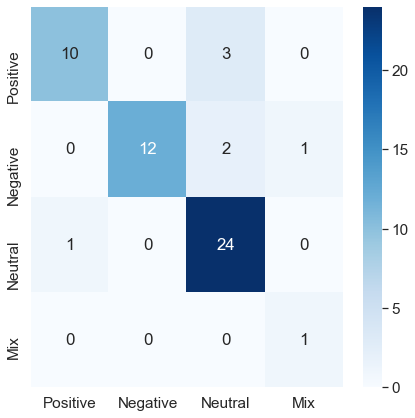

In [43]:
# heatmap sentiment A2 & A3
cm_heatmap(cm_sent23, labels_sent)

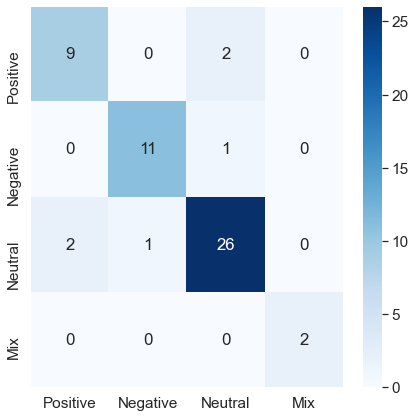

In [44]:
# heatmap sentiment A1 & A3
cm_heatmap(cm_sent13, labels_sent)